# 第7章 様々な分類モデルの構築を行う10本

## ノック61:使用するデータを確認しよう

In [ ]:
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

In [ ]:
import pandas as pd

df = pd.DataFrame(load_data.data, columns = load_data.feature_names)
df["y"] = load_data.target

print(len(df))
print(len(df.columns))
display(df.head())

569
31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
tg_df = df[["mean radius","mean texture","y"]]
display(tg_df.describe())

,mean radius,mean texture,y
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.627417
std,3.524049,4.301036,0.483918
min,6.981000,9.710000,0.000000
25%,11.700000,16.170000,0.000000
50%,13.370000,18.840000,1.000000
75%,15.780000,21.800000,1.000000
max,28.110000,39.280000,1.000000


In [ ]:
tg_df.corr()

,mean radius,mean texture,y
mean radius,1.000000,0.323782,-0.730029
mean texture,0.323782,1.000000,-0.415185
y,-0.730029,-0.415185,1.000000


In [ ]:
print(tg_df["y"].unique())

[0 1]


In [ ]:
print(len(df.loc[tg_df["y"]==0]))
print(len(df.loc[tg_df["y"]==1]))

212
357


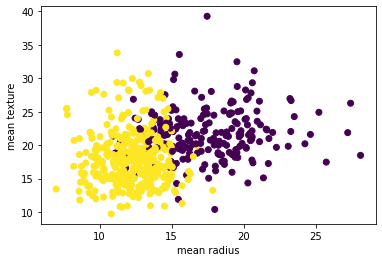

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(tg_df["mean radius"],tg_df["mean texture"], c=tg_df["y"])
plt.xlabel("mean radius")                  
plt.ylabel("mean texture")
plt.show()

## ノック62:データを加工しよう

In [ ]:
X= tg_df[["mean radius","mean texture"]]
y = tg_df["y"]

display(X.head())
display(y.head())

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

398


,mean radius,mean texture
478,11.490,14.59
303,10.490,18.61
155,12.250,17.94
186,18.310,18.58
101,6.981,13.43


171


,mean radius,mean texture
512,13.40,20.52
457,13.21,25.25
439,14.02,15.66
298,14.26,18.17
37,13.03,18.42


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[-0.74998027 -1.09978744]
 [-1.02821446 -0.1392617 ]
 [-0.53852228 -0.29934933]]
[[-0.21855296  0.31710749]
 [-0.27141746  1.44727832]
 [-0.04604776 -0.84412512]]


## ノック63:ロジスティック回帰モデルを構築しよう

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[1 1 1 0 1]
[1 1 1 1 1]


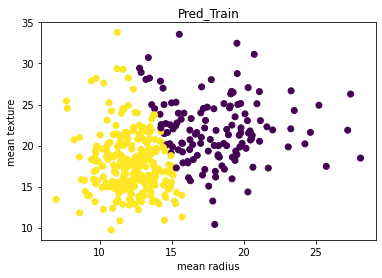

In [ ]:
plt.scatter(X_train["mean radius"],X_train["mean texture"], c=y_train_pred)
plt.title("Pred_Train") 
plt.xlabel("mean radius")                  
plt.ylabel("mean texture")
plt.show()

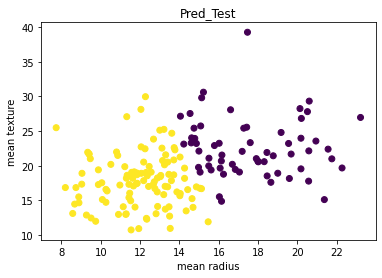

In [ ]:
plt.scatter(X_test["mean radius"],X_test["mean texture"], c=y_test_pred)
plt.title("Pred_Test") 
plt.xlabel("mean radius")                  
plt.ylabel("mean texture")
plt.show()

## ノック64:ロジスティック回帰モデルの決定境界を可視化してみよう

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


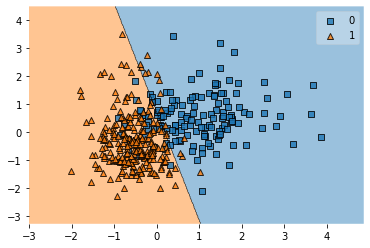

In [ ]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=log_reg)
plt.show()

## ノック65:線形SVMモデルを構築し、決定境界を可視化してみよう

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


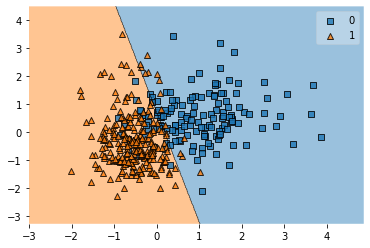

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(random_state=0).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=linear_svm)
plt.show()

## ノック66:カーネルSVMモデルを構築し、決定境界を可視化してみよう

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


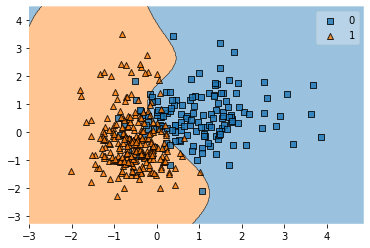

In [ ]:
from sklearn.svm import SVC

kernel_svm = SVC(kernel="rbf",random_state=0).fit(X_train_scaled, y_train)

plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kernel_svm)
plt.show()

## ノック67:K近傍法モデルを構築し、決定境界を可視化してみよう

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_cls = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


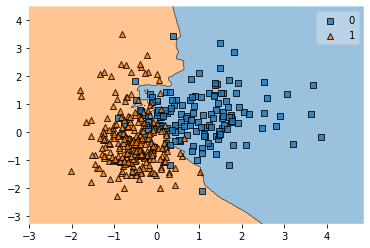

In [ ]:
plot_decision_regions(np.array(X_train_scaled), np.array(y_train), clf=kn_cls)
plt.show()

## ノック68:決定木モデルを構築し、決定境界を可視化してみよう

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

tree_cls = DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


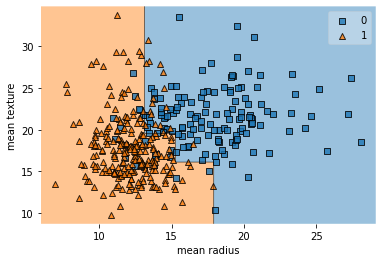

In [ ]:
plot_decision_regions(np.array(X_train), np.array(y_train), clf=tree_cls)
plt.xlabel("mean radius")                  
plt.ylabel("mean texture")
plt.show()

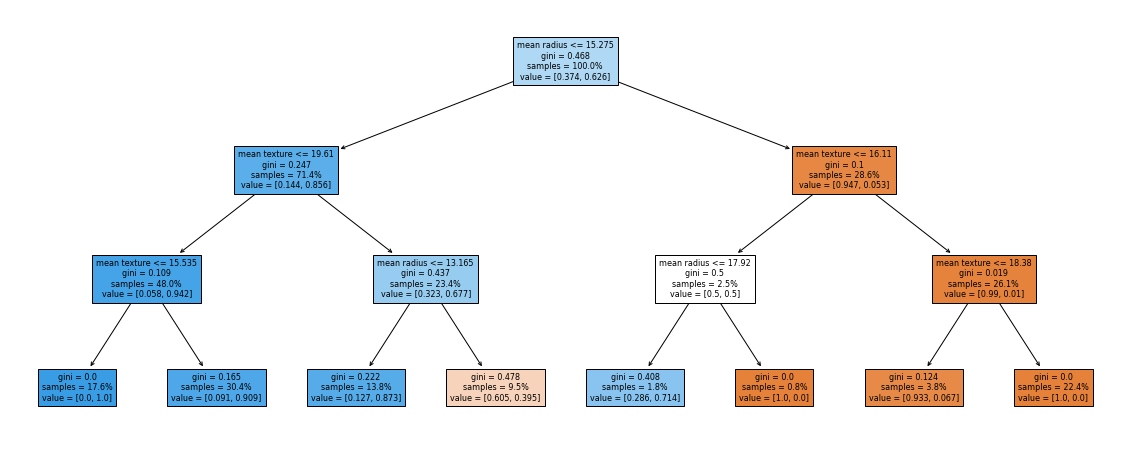

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,8))
tree.plot_tree(tree_cls,feature_names=["mean radius","mean texture"],filled=True,proportion=True,fontsize=8)
plt.show()

## ノック69:ランダムフォレストモデルを構築し、決定境界を可視化してみよう

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3,random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


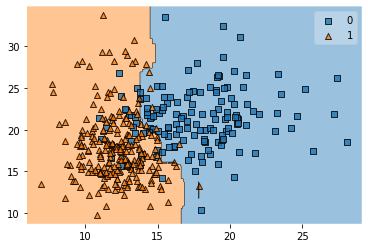

In [ ]:
plot_decision_regions(np.array(X_train), np.array(y_train), clf=rf_cls)
plt.show()

## ノック70:線形で分類できないデータを分類してみよう

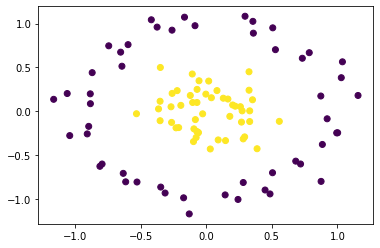

In [ ]:
from sklearn.datasets import make_circles

X_circle, y_circle = make_circles(random_state=42, n_samples=100, noise=0.1, factor=0.3)

plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle)
plt.show()

In [ ]:
models = {"Logistic Regression":LogisticRegression(), 
          "Linear SVM":LinearSVC(random_state=0),
          "Kernel SVM":SVC(kernel="rbf",random_state=0),
          "K Neighbors":KNeighborsClassifier(),
          "Decision Tree":DecisionTreeClassifier(max_depth=3,random_state=0),
          "Random Forest":RandomForestClassifier(max_depth=3,random_state=0)}

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

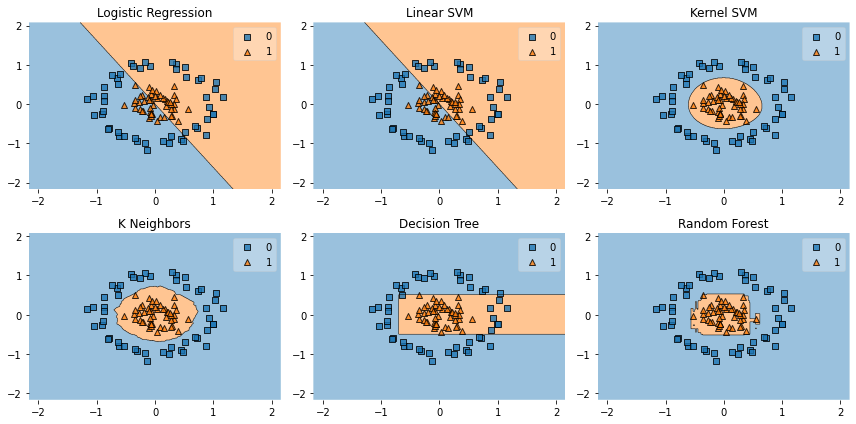

In [ ]:
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(12, 6))

for model_name, num in zip(models.keys(), itertools.product([0, 1, 2],repeat=2)):

  model = models[model_name].fit(X_circle,y_circle)
  
  ax = plt.subplot(gs[num[0], num[1]])
  fig = plot_decision_regions(X_circle, y_circle,clf=model)
  plt.title(model_name)

plt.tight_layout()
plt.show()